## Parte 2
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [41]:
img_1 = cv.imread('./TP1/img1_tp.png', cv.IMREAD_GRAYSCALE)
img_2 = cv.imread('./TP1/img2_tp.png', cv.IMREAD_GRAYSCALE)

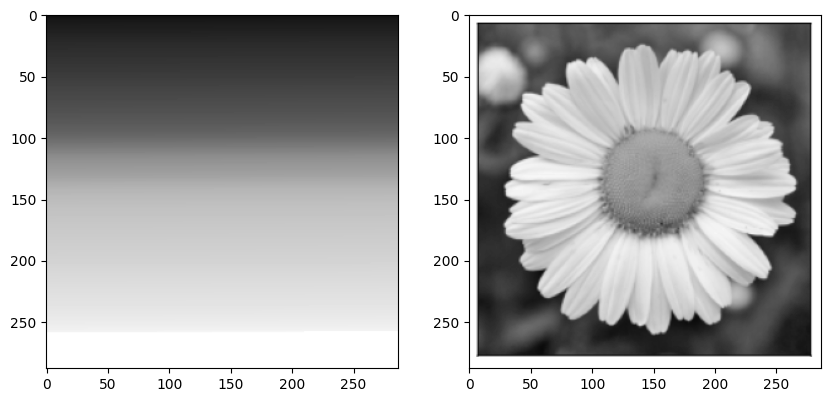

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.subplot(1,2,2)  
plt.imshow(img_2, cmap='gray')

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?


In [43]:
hist_img1 = cv.calcHist([img_1], [0], None, [100], [0, 100])
hist_img2 = cv.calcHist([img_2], [0], None, [100], [0, 100])


Text(0, 0.5, 'Cantidad de píxeles')

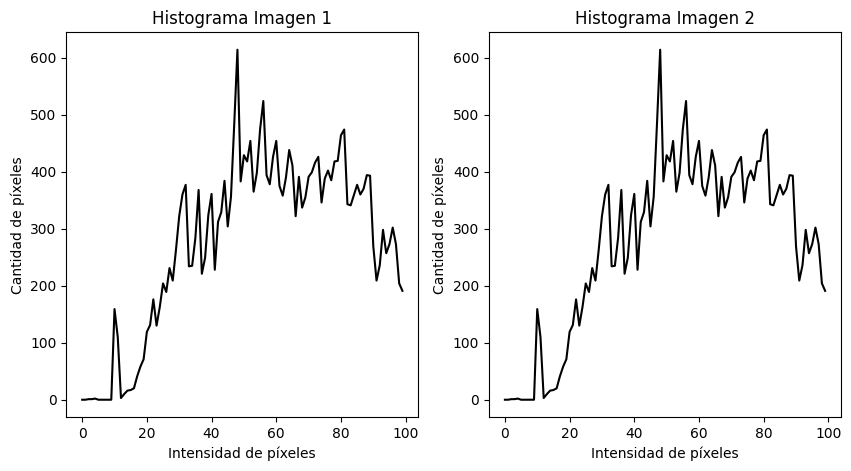

In [44]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_img1, color='black')
plt.title('Histograma Imagen 1')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Cantidad de píxeles')
plt.subplot(1, 2, 2)
plt.plot(hist_img2, color='black')
plt.title('Histograma Imagen 2')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Cantidad de píxeles')


3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadass 


In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def segment_sky_water_land(image):
  # convert to hsv
  hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

  lower_sky = np.array([100, 50, 50])
  upper_sky = np.array([140, 255, 255])

  lower_water = np.array([36, 25, 25])
  upper_water = np.array([80, 255, 255])

  lower_land = np.array([10, 50, 50])
  upper_land = np.array([30, 255, 255])

  # masking for each color range
  mask_sky = cv.inRange(hsv, lower_sky, upper_sky)
  mask_water = cv.inRange(hsv, lower_water, upper_water)
  mask_land = cv.inRange(hsv, lower_land, upper_land)

  # segmentation
  sky = cv.bitwise_and(image, image, mask=mask_sky)
  water = cv.bitwise_and(image, image, mask=mask_water)
  land = cv.bitwise_and(image, image, mask=mask_land)

  plt.figure(figsize=(10, 10))

  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  plt.subplot(2, 2, 2)
  plt.imshow(cv.cvtColor(sky, cv.COLOR_BGR2RGB))
  plt.title('Cielo')

  plt.subplot(2, 2, 3)
  plt.imshow(cv.cvtColor(water, cv.COLOR_BGR2RGB))
  plt.title('Agua')

  plt.subplot(2, 2, 4)
  plt.imshow(cv.cvtColor(land, cv.COLOR_BGR2RGB))
  plt.title('Tierra')

  plt.tight_layout()
  plt.show()



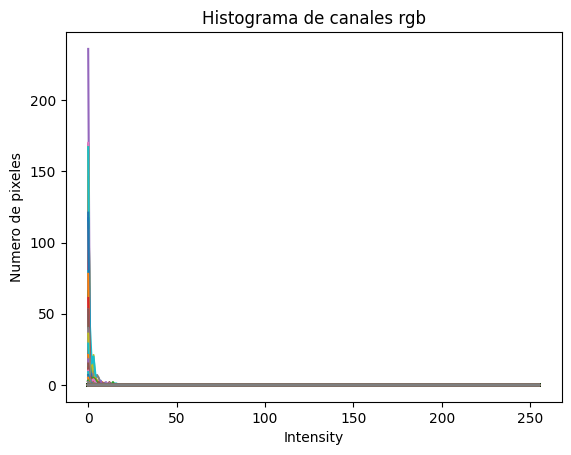

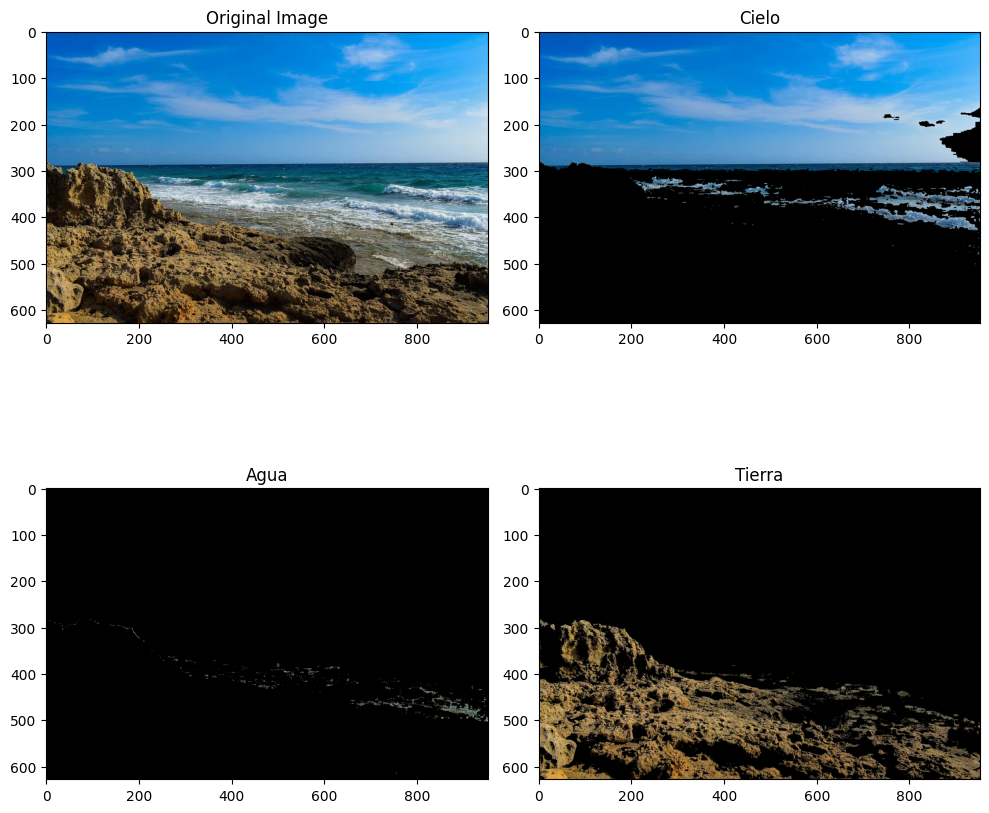

In [18]:
image = cv.imread('./TP1/segmentacion.png')

# Histograma de los canales rgb
bgr_hist = cv.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

plt.plot(bgr_hist[:,0])
plt.plot(bgr_hist[:,1])
plt.plot(bgr_hist[:,2])
plt.title('Histograma de canales rgb')
plt.xlabel('Intensity')
plt.ylabel('Numero de pixeles')
plt.show()

# Segment the sky, water and land regions
segment_sky_water_land(image)